# Random forest method

https://www.datacamp.com/tutorial/decision-tree-classification-python

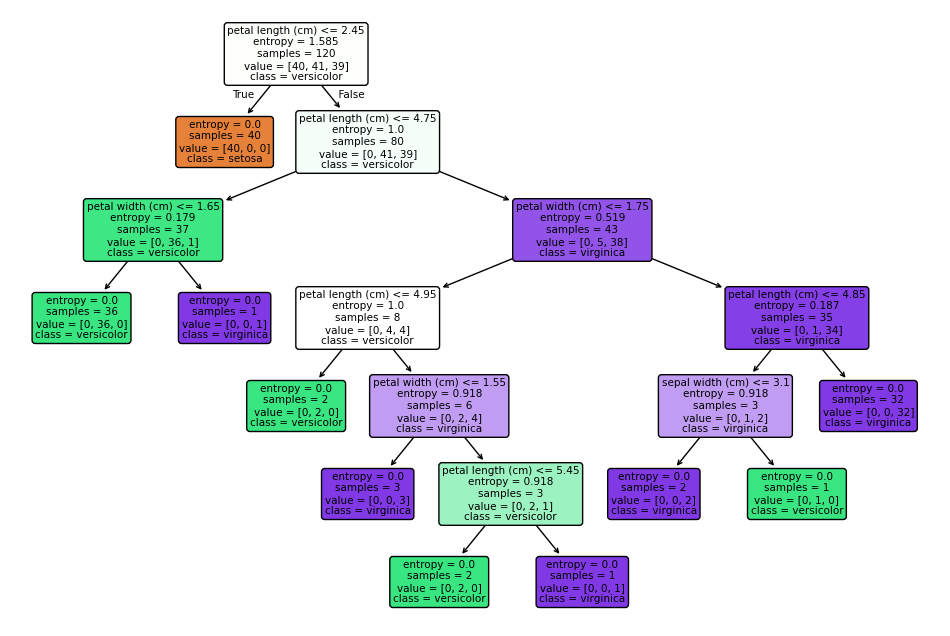

Accuracy of Decision Tree Classifier: 100.00%


In [47]:
# IMport necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy * 100:.2f}%")

In [48]:

dt_model.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 42,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1, 2]),
 'n_classes_': np.int64(3),
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7f8b470806c0>}

# Conditional probabilities: Naive Bayes (Див "Теорема Баєса")

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
sepal_length = iris.data[:, 0] # Sepal length is the first feature
target = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sepal_length, target, test_size=0.2, random_state=42)

In [50]:
total_samples = len(y_train)
class_counts = {class_label: sum(y_train == class_label) for class_label in set(y_train)}
prior_probailities = {class_label: count / total_samples for class_label, count in class_counts.items()}
prior_probailities

{np.int64(0): np.float64(0.3333333333333333),
 np.int64(1): np.float64(0.3416666666666667),
 np.int64(2): np.float64(0.325)}

In [51]:
class_counts

{np.int64(0): np.int64(40),
 np.int64(1): np.int64(41),
 np.int64(2): np.int64(39)}

In [52]:
class_counts.items()

dict_items([(np.int64(0), np.int64(40)), (np.int64(1), np.int64(41)), (np.int64(2), np.int64(39))])

In [53]:
X_train

array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.2, 5.8, 6. , 6.7,
       5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8,
       5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6,
       6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. ,
       5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7,
       5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3,
       4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1,
       4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7,
       4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9,
       5.8, 5.8, 7.1])

In [54]:
from scipy.stats import norm
likelihoods = {class_label: norm.pdf(X_train, loc = X_train[y_train == class_label].mean(), scale = X_train[y_train == class_label].std()) for class_label in set(y_train)}
# a-постеріоргі вірогідність належати до класу 0, 1 чи 2 - з урахуванням довжини чашолистка

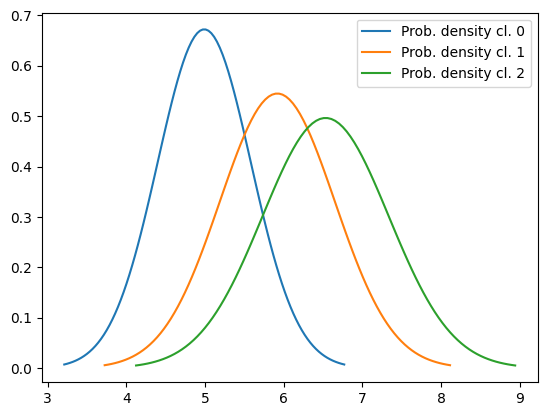

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

for class_label in set(y_train):
    mu = X_train[y_train == class_label].mean()
    variance = X_train[y_train == class_label].std()
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'Prob. density cl. {class_label}')
plt.legend()
plt.show()

In [56]:
# перший приклад
X_train[0]

np.float64(4.6)

In [57]:
# Display as Python floats instead of numpy.float64
tuple(float(x) for x in (likelihoods[0][0], likelihoods[1][0], likelihoods[2][0]))

(0.6134848307960548, 0.03584106735857552, 0.006961535714191303)

In [58]:
# a-priori probabilities vs. a-posteriori probabilities - to make a more confident prediction regarding true class
print("a-priori probabilities:", prior_probailities)
posterior_probabilities_0 = {0: likelihoods[0][0], 1: likelihoods[1][0], 2: likelihoods[2][0]}
print("a-posteriori probabilities:", posterior_probabilities_0)

a-priori probabilities: {np.int64(0): np.float64(0.3333333333333333), np.int64(1): np.float64(0.3416666666666667), np.int64(2): np.float64(0.325)}
a-posteriori probabilities: {0: np.float64(0.6134848307960548), 1: np.float64(0.03584106735857552), 2: np.float64(0.006961535714191303)}


# Splitting the features on information gain

Information gain is based on entropy: measurement of impurity of class distribution
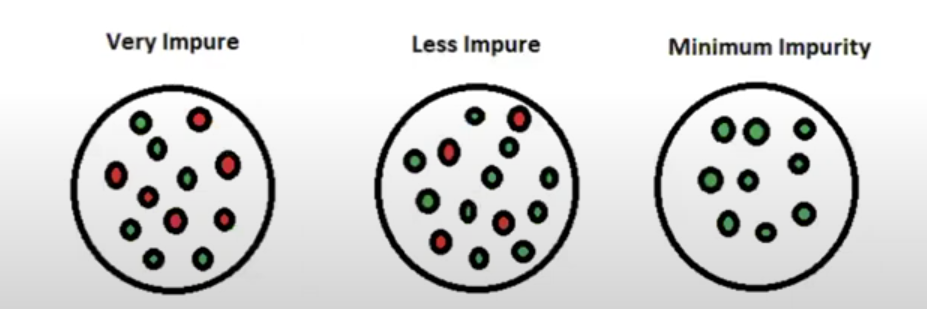

- entropy = 0 -> minimum impurity
- entropy =1 -> 50/50 impurity

Entropy: https://nebius.com/blog/posts/entropy-in-machine-learning </br>
https://www.appliedaicourse.com/blog/entropy-in-machine-learning/

In [59]:
prior_probailities

{np.int64(0): np.float64(0.3333333333333333),
 np.int64(1): np.float64(0.3416666666666667),
 np.int64(2): np.float64(0.325)}

In [60]:
# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [61]:
# Entropy of the a-priori probabilities distribution of versicolor classes (1), one vs. rest

total_samples = len(y_train)

pred_versicolor = np.array([1 if class_ == 1 else 0 for class_ in y_train])
class_counts_versicolor = {class_label: sum(pred_versicolor == class_label) for class_label in set(pred_versicolor)}
prior_probailities_versicolor = {class_label: count / total_samples for class_label, count in class_counts_versicolor.items()}

prior_probailities_array_versicolor = np.array([prob for key, prob in prior_probailities_versicolor.items()])
entropy_ = -np.sum(prior_probailities_array_versicolor * np.log(prior_probailities_array_versicolor + 1e-10)) # Adding small value to avoid log(0)
entropy_


np.float64(0.6421347835839517)

In [62]:
prior_probailities_versicolor

{np.int64(0): np.float64(0.6583333333333333),
 np.int64(1): np.float64(0.3416666666666667)}

In [63]:
class_counts_versicolor

{np.int64(0): np.int64(79), np.int64(1): np.int64(41)}

In [64]:
# Equivalent
from scipy.stats import entropy
# entropy(prior_probailities_array_versicolor, base=2) # If log2 in formula
entropy(prior_probailities_array_versicolor)

np.float64(0.6421347837839517)

In [65]:
# Entropy conditional on the petal length <= 2.45, for class versicolor
petal_length = X_train[:, 2]  # Petal length is the third feature
petal_len_smaller_than_2_45 = np.array([1 if length <= 2.45 else 0 for length in petal_length])
petal_len_smaller_than_2_45

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [66]:
class_probs_petal_length = np.array([total_samples - np.sum(petal_len_smaller_than_2_45), np.sum(petal_len_smaller_than_2_45)]) / total_samples
class_probs_petal_length

array([0.66666667, 0.33333333])

In [67]:
import numpy.ma as ma
group_1 = ma.masked_where(petal_len_smaller_than_2_45 == 1, petal_len_smaller_than_2_45).mask
group_2 = ma.masked_where(petal_len_smaller_than_2_45 == 0, petal_len_smaller_than_2_45).mask

In [68]:
group_1

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [69]:
len(petal_len_smaller_than_2_45[group_1])

40

In [70]:
len(petal_len_smaller_than_2_45[group_2])

80

In [71]:
pred_versicolor[group_1] # petal <= 2.45 == True

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
pred_versicolor[group_2] # petal <= 2.45 == False

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [73]:
len(pred_versicolor[group_2]) - np.sum(pred_versicolor[group_2]) # np.sum(pred_versicolor[group_2]) Сумуємо всі елементи вектора, фактично тільки ті, що рівні 1 (належать до класу 1 )

np.int64(39)

In [74]:
len(pred_versicolor[group_2])

80

In [75]:
total_samples_group_1 = len(petal_len_smaller_than_2_45[group_1])
class_probs_versicolor_group_1 = np.array([total_samples_group_1 - np.sum(pred_versicolor[group_1]), np.sum(pred_versicolor[group_1])]) / total_samples_group_1
entropy_versicolor_group_1 = entropy(class_probs_versicolor_group_1)
class_probs_versicolor_group_1, "Entropy:", entropy_versicolor_group_1

(array([1., 0.]), 'Entropy:', np.float64(0.0))

In [76]:
pred_versicolor[group_1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
pred_versicolor

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [78]:
np.sum(pred_versicolor[group_1])

np.int64(0)

In [79]:
total_samples = len(petal_len_smaller_than_2_45[group_2])
class_probs_versicolor_group_2 = np.array([total_samples - np.sum(pred_versicolor[group_2]), np.sum(pred_versicolor[group_2])]) / total_samples
entropy_versicolor_group_2 = entropy(class_probs_versicolor_group_2)
class_probs_versicolor_group_2, "Entropy:", entropy_versicolor_group_2

(array([0.4875, 0.5125]), 'Entropy:', np.float64(0.6928346479997213))

# Based on the calculations above we can get the following table:
| Condition | Versicolor | | Total |
|:---|---:|---:|---:|
| | **Yes** | **No** | |
| **Petal ≤ 2.45 == Yes** | 0 | 40 | 40 |
| **Petal ≤ 2.45 == No** | 41 | 39 | 80 |

In [80]:
# Calculate the weighted entropy after the split
entropy(np.array([41/80, 39/80]))*class_probs_petal_length[1]

np.float64(0.23094488266657376)

In [81]:
entropy_conditional = (class_probs_petal_length[0] * entropy_versicolor_group_1 + class_probs_petal_length[1] * entropy_versicolor_group_2)
entropy_conditional

np.float64(0.23094488266657376)

In [82]:
i_gain = entropy_ - entropy_conditional
i_gain

np.float64(0.41118990091737795)

In [83]:
pred_versicolor

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Random Forest: Making predictions more robust

- Ensemble learning: https: https://neptune.ai/blog/ensemble-learning-guide
- Bagging & Boositing (Bootstraping): https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

Result: Random Forest </br></br>
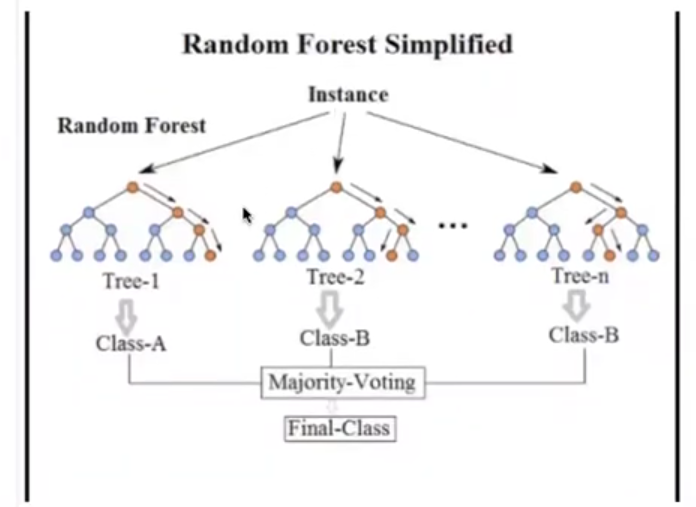

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1, random_state=0) #, n_estimators=60)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy * 100:.2f}%")

Accuracy of Random Forest Classifier: 100.00%
